Text(0.5, 1.0, 'Power spectrum (background)')

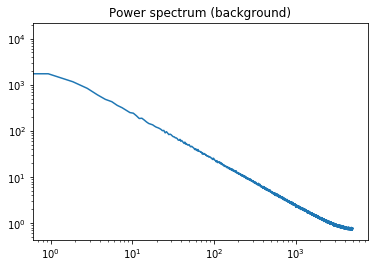

In [2]:
from scipy.optimize import curve_fit
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math
omega = 1.0
t_init = 3
t_end  = 70
n = 1000### Compute 1000 grid points
dt     = math.pi *2*omega/n
x_init = 0
z_init = 1.0
ts    = np.arange(t_init, t_end, dt)
N = ts.size
y_init = 0
fs = 10e2
c_theta = 0.1
c_mu    = 1.5
c_sigma = 0.006
fs = 10e3

def mu(y, t): 
    """Implement the Ornstein–Uhlenbeck mu.""" ## = \theta (\mu-Y_t)
    return c_theta * (c_mu - y)

def sigma(y, t): 
    """Implement the Ornstein–Uhlenbeck sigma.""" ## = \sigma
    return c_sigma
    
def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

ts    = np.arange(t_init, t_end, dt)
ys    = np.zeros(N)

ys[0] = y_init

for i in range(1, ts.size):
    t = (i-1) * dt
    y = ys[i-1]
    ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)

freqs = np.fft.fftfreq(ts.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(ys))
plt.figure()
plt.loglog(freqs[idx], ps[idx])
plt.title('Power spectrum (background)')

In [4]:
w = 0.8
v = 0
omega = 1.0
gamma = 0.025
omega2 = 1.21
gamma2 = 0.0
A = 1.0

def mu(x, z, t):
    return -(gamma*z + omega**2*x)
x_init = 0
z_init = 1.0
x2_init = 0
z2_init = 1.0
ts    = np.arange(t_init, t_end, dt)
xs    = np.zeros(N)
zs    = np.zeros(N)
xs[0] = x_init
zs[0] = z_init
xs2   = np.zeros(N)
zs2    = np.zeros(N)
xs2[0] = x2_init
zs2[0] = z2_init

for i in range(1, ts.size):
    t = (i-1) * dt
    x = xs[i-1]
    z = zs[i-1]
    zs[i] = z + mu(x, z, t) * dt - ys[i]
    xs[i] = x + z*dt
    x2 = xs2[i-1]
    z2 = zs2[i-1]
    zs2[i] = z2 + mu(x2, z2, t, gamma2, omega2,xs[i-1]) * dt + Cos(w,t)*dt
    xs2[i] = x2 + z2*dt     
plt.plot(ts, xs)
    
    #popt, pcov = curve_fit(fitfun, ts, xs)
    #plt.polt(ts, fitfun(ts, *popt))
#plt.show()    

ps = np.abs(np.fft.fft(xs))
plt.figure()
plt.loglog(freqs[idx], ps[idx])
#plt.title('Power spectrum (with excitation)')

TypeError: mu() takes 3 positional arguments but 6 were given

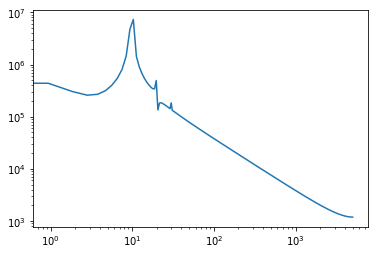

In [36]:
omega = 1.0
gamma = 0.06
A = 1.0

def mu(x, z, t):
    return -(gamma*z + omega**2*x)

ts    = np.arange(t_init, t_end, dt)
xs    = np.zeros(N)
zs    = np.zeros(N)

xs[0] = x_init
zs[0] = z_init


for i in range(1, ts.size):
    t = (i-1) * dt
    x = xs[i-1]
    z = zs[i-1]
    zs[i] = z + mu(x, z, t) * dt - ys[i] + np.cos(t)+np.cos(2*t)+np.cos(3*t)
    xs[i] = x + z*dt
#plt.plot(ts, xs)
    
    #popt, pcov = curve_fit(fitfun, ts, xs)
    #plt.polt(ts, fitfun(ts, *popt))
#plt.show()    

ps = np.abs(np.fft.fft(xs))
plt.figure()
plt.loglog(freqs[idx], ps[idx])
#plt.title('Power spectrum (with excitation)')